# Import des librairies

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier


# Import des datasets

In [59]:
# Load the datasets
pokemon = pd.read_csv("/home/apprenant/Documents/projet-certification/data/raw/pokemon.csv")  # Pokemon Dataset
pokemon = pokemon.rename(index=str, columns={"#": "Number"})
combats = pd.read_csv("/home/apprenant/Documents/projet-certification/data/raw/combats.csv")  # Combats Dataset
tests = pd.read_csv("/home/apprenant/Documents/projet-certification/data/raw/tests.csv")  # Test Dataset
prediction_df = tests.copy()

In [60]:
pokemon.head()

,Number,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [62]:
type(tests)

pandas.core.frame.DataFrame

In [4]:
combats.head()

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


# Analyse du dataset

### Généralités

In [5]:
# Shape of the datasets
print("Shape of Pokemon dataset : " + str(pokemon.shape))
print("Shape of Combats dataset: " + str(combats.shape))

Shape of Pokemon dataset : (800, 12)
Shape of Combats dataset: (50000, 3)


In [6]:
# Check of missing values
print(pokemon.isnull().sum())

Number          0
Name            1
Type 1          0
Type 2        386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64


In [7]:
combats.isnull().sum()

First_pokemon     0
Second_pokemon    0
Winner            0
dtype: int64

In [8]:
# Let's check out the row where a Pokemon name is missing
print(pokemon[pokemon['Name'].isnull()])
print("This pokemon is before the missing Pokemon: " + pokemon['Name'][61])
print("This pokemon is after the missing Pokemon: " + pokemon['Name'][63])

    Number Name    Type 1 Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  \
62      63  NaN  Fighting    NaN  65     105       60       60       70   

    Speed  Generation  Legendary  
62     95           1      False  
This pokemon is before the missing Pokemon: Mankey
This pokemon is after the missing Pokemon: Growlithe


In [9]:
pokemon['Name'][62] = "Primeape"

/tmp/ipykernel_721678/1906487552.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pokemon['Name'][62] = "Primeape"


### Ajout de colonnes pour l'analyse

In [10]:
# Column 'Total_stats" : sum of all the Pokemon stats
pokemon['Total_stats'] = pokemon['HP'] + pokemon['Attack'] + pokemon['Defense'] + pokemon['Sp. Atk'] + pokemon['Sp. Def'] + pokemon['Speed']
pokemon

,Number,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total_stats
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,318
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,405
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,525
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,625
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,309
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True,600
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True,700
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True,600
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True,680


# Analyse exploratoire de la data

### Analyse des victoires de chaque Pokémon

In [11]:
# Calculate the win % of each pokemon 
# Add the calculation to the pokemon dataset 
total_Wins = combats.Winner.value_counts()

# Get the number of wins for each pokemon
numberOfWins = combats.groupby('Winner').count()

# Both methods produce the same results
countByFirst = combats.groupby('Second_pokemon').count()
countBySecond = combats.groupby('First_pokemon').count()
print("Looking at the dimensions of our dataframes")
print("Count by first winner shape: " + str(countByFirst.shape))
print("Count by second winner shape: " + str(countBySecond.shape))
print("Total Wins shape : " + str(total_Wins.shape))


Looking at the dimensions of our dataframes
Count by first winner shape: (784, 2)
Count by second winner shape: (784, 2)
Total Wins shape : (783,)


In [12]:
find_losing_pokemon= np.setdiff1d(countByFirst.index.values, numberOfWins.index.values)-1 #offset because the index and number are off by one
print(find_losing_pokemon)
losing_pokemon = pokemon.iloc[find_losing_pokemon[0],]
print(losing_pokemon)

[230]
Number             231
Name           Shuckle
Type 1             Bug
Type 2            Rock
HP                  20
Attack              10
Defense            230
Sp. Atk             10
Sp. Def            230
Speed                5
Generation           2
Legendary        False
Total_stats        505
Name: 230, dtype: object


In [13]:
numberOfWins = numberOfWins.sort_index()
numberOfWins['Total Fights'] = countByFirst.Winner + countBySecond.Winner
numberOfWins['Win Percentage']= numberOfWins.First_pokemon/numberOfWins['Total Fights']

# merge the winning dataset and the original pokemon dataset
results2 = pd.merge(pokemon, numberOfWins, right_index = True, left_on='Number')
results = pd.merge(pokemon, numberOfWins, left_on='Number', right_index = True, how='left')

results

,Number,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total_stats,First_pokemon,Second_pokemon,Total Fights,Win Percentage
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,318,37.0,37.0,133.0,0.278195
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,405,46.0,46.0,121.0,0.380165
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,525,89.0,89.0,132.0,0.674242
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,625,70.0,70.0,125.0,0.560000
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,309,55.0,55.0,112.0,0.491071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True,600,39.0,39.0,105.0,0.371429
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True,700,116.0,116.0,131.0,0.885496
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True,600,60.0,60.0,119.0,0.504202
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True,680,89.0,89.0,144.0,0.618056


In [14]:
# We can look at the difference between the two datasets to see which pokemon never recorded a fight
results[results['Win Percentage'].isnull()]

,Number,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total_stats,First_pokemon,Second_pokemon,Total Fights,Win Percentage
11,12,Blastoise,Water,NaN,79,83,100,85,105,78,1,False,530,NaN,NaN,NaN,NaN
32,33,Sandshrew,Ground,NaN,50,75,85,20,30,40,1,False,300,NaN,NaN,NaN,NaN
45,46,Wigglytuff,Normal,Fairy,140,70,45,85,50,45,1,False,435,NaN,NaN,NaN,NaN
65,66,Poliwag,Water,NaN,40,50,40,40,40,90,1,False,300,NaN,NaN,NaN,NaN
77,78,Victreebel,Grass,Poison,80,105,65,100,70,70,1,False,490,NaN,NaN,NaN,NaN
89,90,Magneton,Electric,Steel,50,60,95,120,70,70,1,False,465,NaN,NaN,NaN,NaN
143,144,Ditto,Normal,NaN,48,48,48,48,48,48,1,False,288,NaN,NaN,NaN,NaN
182,183,Ariados,Bug,Poison,70,90,70,60,60,40,2,False,390,NaN,NaN,NaN,NaN
230,231,Shuckle,Bug,Rock,20,10,230,10,230,5,2,False,505,NaN,NaN,NaN,NaN
235,236,Ursaring,Normal,NaN,90,130,75,75,75,55,2,False,500,NaN,NaN,NaN,NaN


In [15]:
results[np.isfinite(results['Win Percentage'])].sort_values(by = ['Win Percentage']).head(10)

,Number,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total_stats,First_pokemon,Second_pokemon,Total Fights,Win Percentage
289,290,Silcoon,Bug,NaN,50,35,55,25,25,15,3,False,205,3.0,3.0,138.0,0.021739
189,190,Togepi,Fairy,NaN,35,20,65,40,65,20,2,False,245,3.0,3.0,122.0,0.024590
638,639,Solosis,Psychic,NaN,45,30,40,105,50,20,5,False,290,4.0,4.0,129.0,0.031008
236,237,Slugma,Fire,NaN,40,40,40,70,40,20,2,False,250,4.0,4.0,123.0,0.032520
576,577,Munna,Psychic,NaN,76,25,45,67,55,24,5,False,292,5.0,5.0,128.0,0.039062
188,189,Igglybuff,Normal,Fairy,90,30,15,40,20,15,2,False,210,5.0,5.0,115.0,0.043478
394,395,Wynaut,Psychic,NaN,95,23,48,23,48,23,3,False,260,6.0,6.0,130.0,0.046154
209,210,Wooper,Water,Ground,55,45,45,25,25,15,2,False,210,6.0,6.0,125.0,0.048000
291,292,Cascoon,Bug,NaN,50,35,55,25,25,15,3,False,205,7.0,7.0,133.0,0.052632
752,753,Spritzee,Fairy,NaN,78,52,60,63,65,23,6,False,341,8.0,8.0,133.0,0.060150


In [16]:
results[np.isfinite(results['Win Percentage'])].sort_values(by = ['Win Percentage'], ascending = False).head(10)

,Number,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total_stats,First_pokemon,Second_pokemon,Total Fights,Win Percentage
154,155,Mega Aerodactyl,Rock,Flying,80,135,85,70,95,150,1,False,615,127.0,127.0,129.0,0.984496
512,513,Weavile,Dark,Ice,70,120,65,45,85,125,4,False,510,116.0,116.0,119.0,0.974790
703,704,Tornadus Therian Forme,Flying,NaN,79,100,80,110,90,121,5,True,580,121.0,121.0,125.0,0.968000
19,20,Mega Beedrill,Bug,Poison,65,150,40,15,80,145,1,False,495,115.0,115.0,119.0,0.966387
153,154,Aerodactyl,Rock,Flying,80,105,65,60,75,130,1,False,515,136.0,136.0,141.0,0.964539
476,477,Mega Lopunny,Normal,Fighting,65,136,94,54,96,135,4,False,580,124.0,124.0,129.0,0.961240
726,727,Greninja,Water,Dark,72,95,67,103,71,122,6,False,530,122.0,122.0,127.0,0.960630
716,717,Meloetta Pirouette Forme,Normal,Fighting,100,128,90,77,77,128,5,False,600,118.0,118.0,123.0,0.959350
164,165,Mega Mewtwo Y,Psychic,NaN,106,150,70,194,120,140,1,True,780,119.0,119.0,125.0,0.952000
349,350,Mega Sharpedo,Water,Dark,70,140,70,110,65,105,3,False,560,114.0,114.0,120.0,0.950000


### Résumé de la donnée

In [17]:
results.describe()

,Number,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Total_stats,First_pokemon,Second_pokemon,Total Fights,Win Percentage
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800.00000,783.000000,783.000000,783.000000,783.000000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375,435.10250,63.856960,63.856960,127.541507,0.501538
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129,119.96304,32.925941,32.925941,11.397402,0.254993
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000,180.00000,3.000000,3.000000,92.000000,0.021739
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000,330.00000,36.000000,36.000000,120.000000,0.284228
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000,450.00000,62.000000,62.000000,128.000000,0.491071
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000,515.00000,91.000000,91.000000,135.000000,0.717644
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000,780.00000,152.000000,152.000000,164.000000,0.984496


### Quelques graphiques

##### Nombre de Pokémon par type

Text(0.5, 1.0, 'Total Pokemon by Type 1')

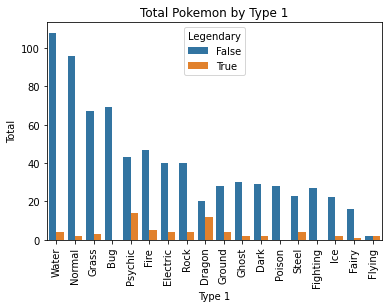

In [18]:
sns.set_color_codes("pastel")
ax = sns.countplot(x="Type 1", hue="Legendary", data=results, order=results['Type 1'].value_counts().index)
plt.xticks(rotation= 90)
plt.xlabel('Type 1')
plt.ylabel('Total')
plt.title("Total Pokemon by Type 1")

Text(0.5, 1.0, 'Total Pokemon by Type 2')

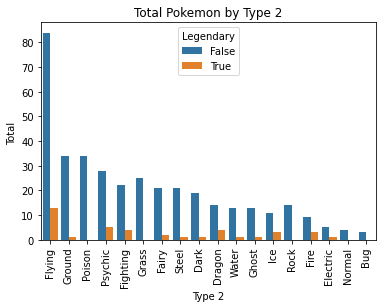

In [19]:
ax = sns.countplot(x="Type 2", hue="Legendary", data=results, order=results['Type 2'].value_counts().index)
plt.xticks(rotation= 90)
plt.xlabel('Type 2')
plt.ylabel('Total ')
plt.title("Total Pokemon by Type 2")

##### Répartition des Pokémon selon leur total BST

/home/apprenant/Documents/projet-certification/env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


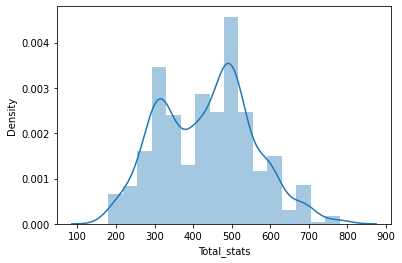

In [20]:
sns.distplot(pokemon.Total_stats)
plt.show()

In [21]:
mean_stats = pokemon['Total_stats'].mean()
print(mean_stats)

435.1025


In [22]:
#closest value from mean_stats
average_pokemon = min(pokemon['Total_stats'], key=lambda x: abs(x-mean_stats))
print(pokemon.loc[((pokemon['Total_stats'] >= average_pokemon-5) & (pokemon['Total_stats'] <= average_pokemon+5)), ['Name', 'Total_stats']])

           Name  Total_stats
29        Arbok          438
45   Wigglytuff          435
58      Persian          440
122     Tangela          435
126      Seadra          440
210    Quagsire          430
215  Misdreavus          435
222      Gligar          430
227    Qwilfish          430
233     Sneasel          430
300     Swellow          430
302    Pelipper          430
312    Vigoroth          440
331      Lairon          430
369    Lunatone          440
370     Solrock          440
384     Kecleon          440
531       Rotom          440
661       Klang          440
772     Dedenne          431


In [23]:
sorted_pokemon_df = pokemon.sort_values(by='Total_stats')
#pokemon with 10 lowest stats
print(sorted_pokemon_df[['Name', 'Total_stats']].head(10))

           Name  Total_stats
206     Sunkern          180
322     Azurill          190
446   Kricketot          194
288     Wurmple          195
16       Weedle          195
13     Caterpie          195
303       Ralts          198
732  Scatterbug          200
139    Magikarp          200
381      Feebas          200


In [24]:
#pokemon with 10 highest stats
print(sorted_pokemon_df[['Name', 'Total_stats', 'Legendary']].tail(10))

                    Name  Total_stats  Legendary
413       Mega Metagross          700      False
409       Mega Salamence          700      False
494        Mega Garchomp          700      False
712  Kyurem White Kyurem          700       True
552               Arceus          720       True
424       Primal Groudon          770       True
422        Primal Kyogre          770       True
164        Mega Mewtwo Y          780       True
426        Mega Rayquaza          780       True
163        Mega Mewtwo X          780       True


In [25]:
legendary_pokemon = pokemon.loc[pokemon['Legendary'] == True]
legendary_pokemon = legendary_pokemon.sort_values(by='Total_stats')
print(legendary_pokemon[['Name', 'Total_stats']].head(20))

                          Name  Total_stats
156                   Articuno          580
539                      Azelf          580
699                   Cobalion          580
700                  Terrakion          580
701                   Virizion          580
702   Tornadus Incarnate Forme          580
703     Tornadus Therian Forme          580
704  Thundurus Incarnate Forme          580
538                    Mesprit          580
416                  Registeel          580
415                     Regice          580
705    Thundurus Therian Forme          580
158                    Moltres          580
157                     Zapdos          580
414                   Regirock          580
262                     Raikou          580
537                       Uxie          580
264                    Suicune          580
263                      Entei          580
794         Zygarde Half Forme          600


##### Analyse des Pokémon selon leur génération

1    166
5    165
3    160
4    121
2    106
6     82
Name: Generation, dtype: int64


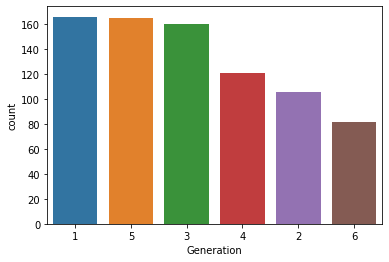

In [26]:
# New pokemon introduced on each generation, sort ascendingly
print(pokemon['Generation'].value_counts())

sns.countplot(x='Generation', data=pokemon, order=pokemon['Generation'].value_counts().index)
plt.show()

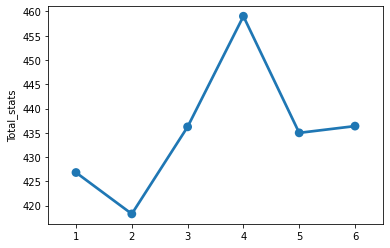

In [27]:
# Group data by generation
group_df = pokemon.drop(['Number', 'Legendary'], axis=1)
pokemon_groups = group_df.groupby('Generation')
pokemon_groups_mean = pokemon_groups.mean()

sns.pointplot(x=pokemon_groups_mean.index.values, y=pokemon_groups_mean['Total_stats'])
plt.show()

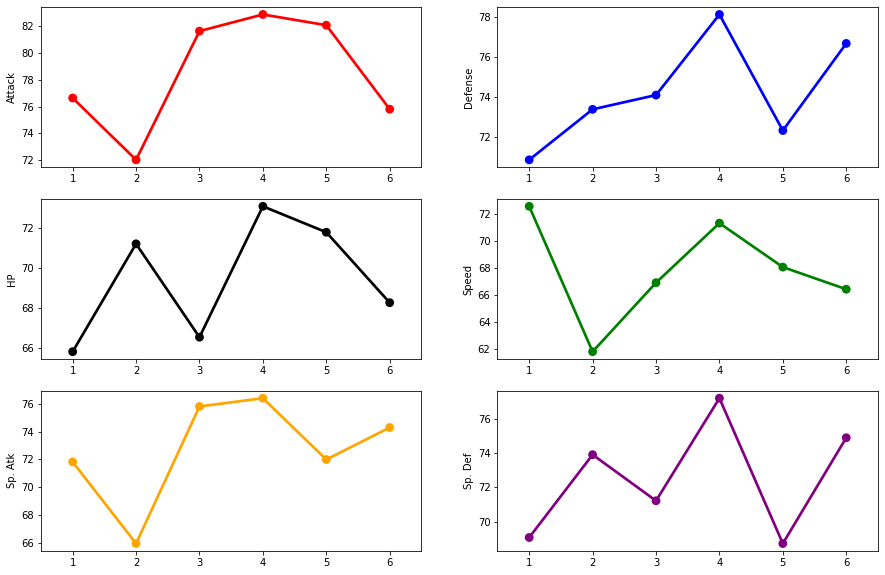

In [28]:
fig, axes = plt.subplots(ncols=2, nrows=3, figsize=(15, 10))
sns.pointplot(x=pokemon_groups_mean.index.values, y=pokemon_groups_mean['Attack'], color='red', ax=axes[0][0])
sns.pointplot(x=pokemon_groups_mean.index.values, y=pokemon_groups_mean['Defense'], color='blue', ax=axes[0][1])
sns.pointplot(x=pokemon_groups_mean.index.values, y=pokemon_groups_mean['HP'], color='black', ax=axes[1][0])
sns.pointplot(x=pokemon_groups_mean.index.values, y=pokemon_groups_mean['Speed'], color='green', ax=axes[1][1])
sns.pointplot(x=pokemon_groups_mean.index.values, y=pokemon_groups_mean['Sp. Atk'], color='orange', ax=axes[2][0])
sns.pointplot(x=pokemon_groups_mean.index.values, y=pokemon_groups_mean['Sp. Def'], color='purple', ax=axes[2][1])

plt.show()

##### Analyse des taux de victoire des Pokémon

In [29]:
results.groupby('Type 1').agg({'Win Percentage':'mean'}).sort_values(by = ['Win Percentage'], ascending = False)

,Win Percentage
Type 1,
Flying,0.765061
Dragon,0.633587
Electric,0.632861
Dark,0.629726
Fire,0.579215
Psychic,0.545747
Ground,0.541526
Normal,0.535578
Ghost,0.484027


##### Corrélation entre le taux de victoires et les statistiques des Pokémon

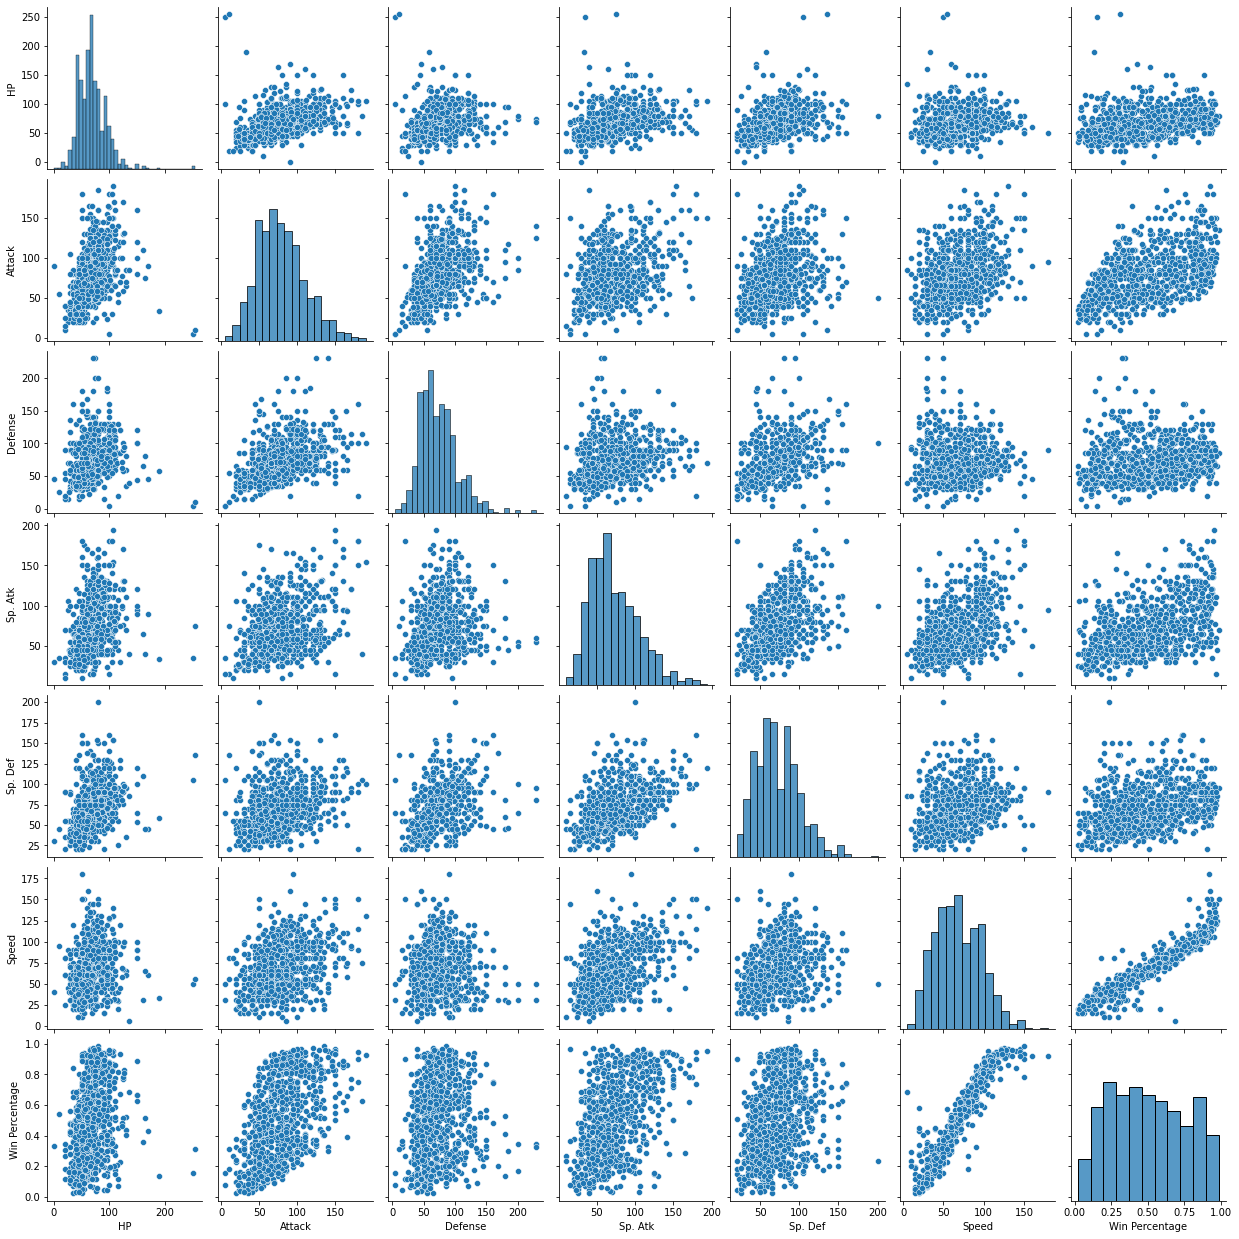

In [30]:
col = ['Type 1','HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Win Percentage']
sns.pairplot(results.loc[:,col].dropna())

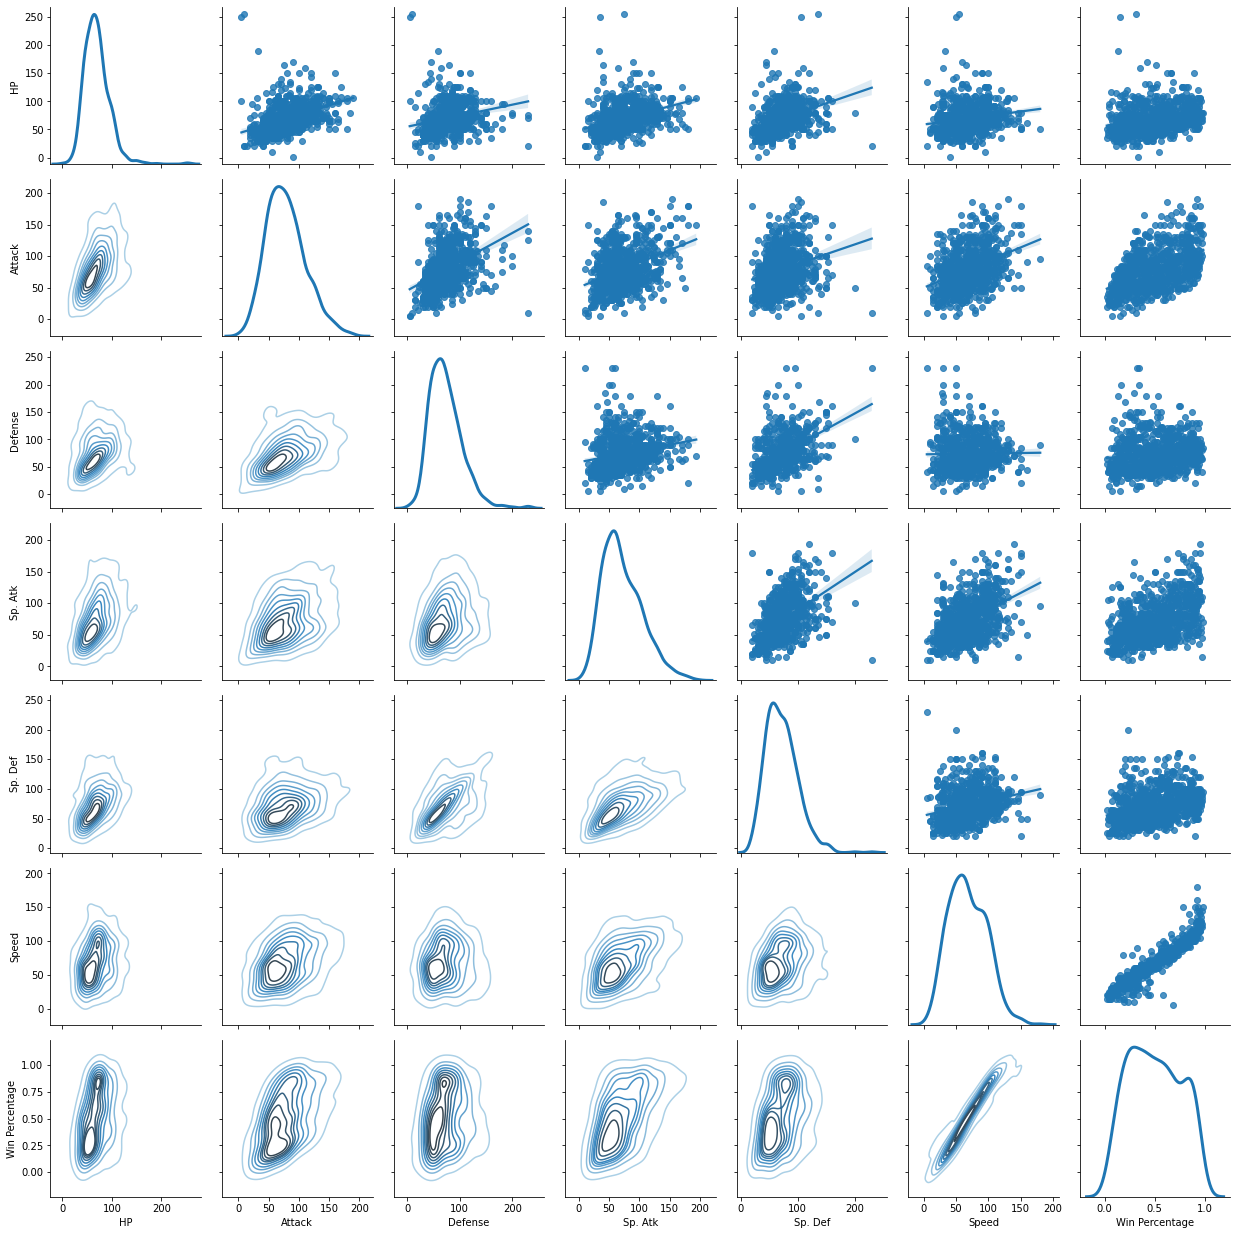

In [31]:
g = sns.PairGrid(results.loc[:,col], diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(sns.regplot)
g.map_diag(sns.kdeplot, lw=3)

In [32]:
results.loc[:,col].corr()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Win Percentage
HP,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.258006
Attack,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.500181
Defense,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.129426
Sp. Atk,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.478940
Sp. Def,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.324218
Speed,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,0.937742
Win Percentage,0.258006,0.500181,0.129426,0.478940,0.324218,0.937742,1.000000


/tmp/ipykernel_721678/3231645601.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels,fontsize=7)
/tmp/ipykernel_721678/3231645601.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(labels,fontsize=7)


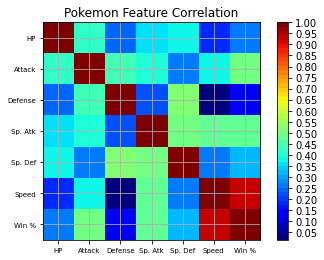

In [33]:
# https://datascience.stackexchange.com/questions/10459/calculation-and-visualization-of-correlation-matrix-with-pandas
# This function was taken from the link above 
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 50)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Pokemon Feature Correlation')
    labels=['Type 1','HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Win %']
    ax1.set_xticklabels(labels,fontsize=7)
    ax1.set_yticklabels(labels,fontsize=7)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[0.00,.05,.10,.15,.20,.25,.30,.35,.40,.45,.50,.55,.60,.65,.70,.75,.8,.85,.90,.95,1])
    plt.show()

correlation_matrix(results.loc[:,col])

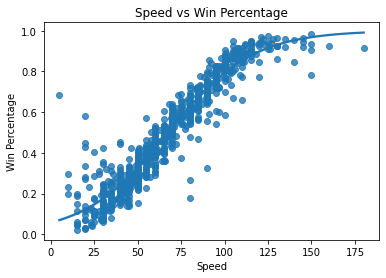

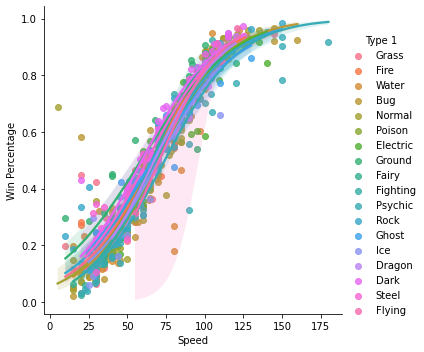

In [34]:
sns.regplot(x="Speed", y="Win Percentage", data=results, logistic=True).set_title("Speed vs Win Percentage")
sns.lmplot(x="Speed", y="Win Percentage", data=results, hue = 'Type 1',  logistic=True)

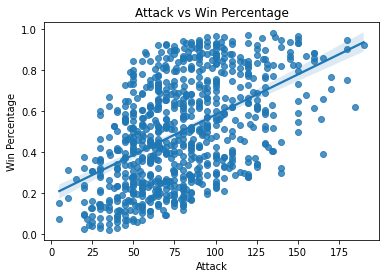

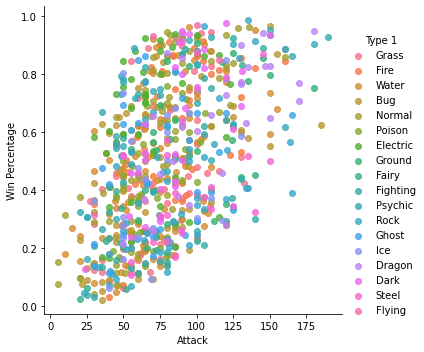

In [35]:
ax = sns.regplot(x="Attack", y="Win Percentage", data=results).set_title("Attack vs Win Percentage")
sns.lmplot(x="Attack", y="Win Percentage", data=results, hue = 'Type 1',fit_reg =False)

### Data cleaning

In [36]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Number       800 non-null    int64 
 1   Name         800 non-null    object
 2   Type 1       800 non-null    object
 3   Type 2       414 non-null    object
 4   HP           800 non-null    int64 
 5   Attack       800 non-null    int64 
 6   Defense      800 non-null    int64 
 7   Sp. Atk      800 non-null    int64 
 8   Sp. Def      800 non-null    int64 
 9   Speed        800 non-null    int64 
 10  Generation   800 non-null    int64 
 11  Legendary    800 non-null    bool  
 12  Total_stats  800 non-null    int64 
dtypes: bool(1), int64(9), object(3)
memory usage: 114.3+ KB


In [37]:
pokemon['Type 2'] = pokemon['Type 2'].fillna('None')
#changing true/false to 1/0 in Legendary column
pokemon['Legendary'] = pokemon['Legendary'].map({False: 0, True:1})

In [38]:
pokemon

,Number,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total_stats
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,0,318
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,0,405
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,0,525
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,0,625
4,5,Charmander,Fire,None,39,52,43,60,50,65,1,0,309
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,1,600
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,1,700
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,1,600
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,1,680


In [39]:
name_df = pokemon.iloc[:, 0:2]
name_dict = name_df.set_index('Number').to_dict()['Name']
name_dict

{1: 'Bulbasaur',
 2: 'Ivysaur',
 3: 'Venusaur',
 4: 'Mega Venusaur',
 5: 'Charmander',
 6: 'Charmeleon',
 7: 'Charizard',
 8: 'Mega Charizard X',
 9: 'Mega Charizard Y',
 10: 'Squirtle',
 11: 'Wartortle',
 12: 'Blastoise',
 13: 'Mega Blastoise',
 14: 'Caterpie',
 15: 'Metapod',
 16: 'Butterfree',
 17: 'Weedle',
 18: 'Kakuna',
 19: 'Beedrill',
 20: 'Mega Beedrill',
 21: 'Pidgey',
 22: 'Pidgeotto',
 23: 'Pidgeot',
 24: 'Mega Pidgeot',
 25: 'Rattata',
 26: 'Raticate',
 27: 'Spearow',
 28: 'Fearow',
 29: 'Ekans',
 30: 'Arbok',
 31: 'Pikachu',
 32: 'Raichu',
 33: 'Sandshrew',
 34: 'Sandslash',
 35: 'Nidoran♀',
 36: 'Nidorina',
 37: 'Nidoqueen',
 38: 'Nidoran♂',
 39: 'Nidorino',
 40: 'Nidoking',
 41: 'Clefairy',
 42: 'Clefable',
 43: 'Vulpix',
 44: 'Ninetales',
 45: 'Jigglypuff',
 46: 'Wigglytuff',
 47: 'Zubat',
 48: 'Golbat',
 49: 'Oddish',
 50: 'Gloom',
 51: 'Vileplume',
 52: 'Paras',
 53: 'Parasect',
 54: 'Venonat',
 55: 'Venomoth',
 56: 'Diglett',
 57: 'Dugtrio',
 58: 'Meowth',
 59: 'Per

In [40]:
#creating dictionaries
type_df = pokemon.iloc[:, 0:4]
type_df = type_df.drop('Name', axis=1)

type_dict = type_df.set_index('Number').T.to_dict('list')
type_dict

{1: ['Grass', 'Poison'],
 2: ['Grass', 'Poison'],
 3: ['Grass', 'Poison'],
 4: ['Grass', 'Poison'],
 5: ['Fire', 'None'],
 6: ['Fire', 'None'],
 7: ['Fire', 'Flying'],
 8: ['Fire', 'Dragon'],
 9: ['Fire', 'Flying'],
 10: ['Water', 'None'],
 11: ['Water', 'None'],
 12: ['Water', 'None'],
 13: ['Water', 'None'],
 14: ['Bug', 'None'],
 15: ['Bug', 'None'],
 16: ['Bug', 'Flying'],
 17: ['Bug', 'Poison'],
 18: ['Bug', 'Poison'],
 19: ['Bug', 'Poison'],
 20: ['Bug', 'Poison'],
 21: ['Normal', 'Flying'],
 22: ['Normal', 'Flying'],
 23: ['Normal', 'Flying'],
 24: ['Normal', 'Flying'],
 25: ['Normal', 'None'],
 26: ['Normal', 'None'],
 27: ['Normal', 'Flying'],
 28: ['Normal', 'Flying'],
 29: ['Poison', 'None'],
 30: ['Poison', 'None'],
 31: ['Electric', 'None'],
 32: ['Electric', 'None'],
 33: ['Ground', 'None'],
 34: ['Ground', 'None'],
 35: ['Poison', 'None'],
 36: ['Poison', 'None'],
 37: ['Poison', 'Ground'],
 38: ['Poison', 'None'],
 39: ['Poison', 'None'],
 40: ['Poison', 'Ground'],
 41:

In [41]:
stats_df = pokemon.drop(['Type 1', 'Type 2', 'Name', 'Generation', 'Total_stats'], axis=1)
stats_dict = stats_df.set_index('Number').T.to_dict('list')
stats_dict

{1: [45, 49, 49, 65, 65, 45, 0],
 2: [60, 62, 63, 80, 80, 60, 0],
 3: [80, 82, 83, 100, 100, 80, 0],
 4: [80, 100, 123, 122, 120, 80, 0],
 5: [39, 52, 43, 60, 50, 65, 0],
 6: [58, 64, 58, 80, 65, 80, 0],
 7: [78, 84, 78, 109, 85, 100, 0],
 8: [78, 130, 111, 130, 85, 100, 0],
 9: [78, 104, 78, 159, 115, 100, 0],
 10: [44, 48, 65, 50, 64, 43, 0],
 11: [59, 63, 80, 65, 80, 58, 0],
 12: [79, 83, 100, 85, 105, 78, 0],
 13: [79, 103, 120, 135, 115, 78, 0],
 14: [45, 30, 35, 20, 20, 45, 0],
 15: [50, 20, 55, 25, 25, 30, 0],
 16: [60, 45, 50, 90, 80, 70, 0],
 17: [40, 35, 30, 20, 20, 50, 0],
 18: [45, 25, 50, 25, 25, 35, 0],
 19: [65, 90, 40, 45, 80, 75, 0],
 20: [65, 150, 40, 15, 80, 145, 0],
 21: [40, 45, 40, 35, 35, 56, 0],
 22: [63, 60, 55, 50, 50, 71, 0],
 23: [83, 80, 75, 70, 70, 101, 0],
 24: [83, 80, 80, 135, 80, 121, 0],
 25: [30, 56, 35, 25, 35, 72, 0],
 26: [55, 81, 60, 50, 70, 97, 0],
 27: [40, 60, 30, 31, 31, 70, 0],
 28: [65, 90, 65, 61, 61, 100, 0],
 29: [35, 60, 44, 40, 54, 55,

In [42]:
#changing winner to 0 and 1, each corresponds to first and second pokemon respectively
combats.Winner[combats.Winner == combats.First_pokemon] = 0
combats.Winner[combats.Winner == combats.Second_pokemon] = 1

print(combats.head(5))

   First_pokemon  Second_pokemon  Winner
0            266             298       1
1            702             701       1
2            191             668       1
3            237             683       1
4            151             231       0


In [43]:
def replace_things(data):
    #map each battles to pokemon data
    
    data['First_pokemon_stats'] = data.First_pokemon.map(stats_dict)
    data['Second_pokemon_stats'] = data.Second_pokemon.map(stats_dict)

    data['First_pokemon'] = data.First_pokemon.map(type_dict)
    data['Second_pokemon'] = data.Second_pokemon.map(type_dict)

    return data

In [44]:
def calculate_stats(data):
    #calculate stats difference
    
    stats_col = ['HP_diff', 'Attack_diff', 'Defense_diff', 'Sp.Atk_diff', 'Sp.Def_diff', 'Speed_diff', 'Legendary_diff']
    diff_list = []

    for row in data.itertuples():
        diff_list.append(np.array(row.First_pokemon_stats) - np.array(row.Second_pokemon_stats))

    stats_df = pd.DataFrame(diff_list, columns=stats_col)
    data = pd.concat([data, stats_df], axis=1)
    data.drop(['First_pokemon_stats', 'Second_pokemon_stats'], axis=1, inplace=True)

    return data

In [45]:
def calculate_effectiveness(data):
    '''
        This function creates a new column of each pokemon's effectiveness against it's enemy.
        every effectiveness starts with 1, if an effective type is found on enemy's type, effectiveness * 2
        if not very effective is found on enemy's type, effectiveness / 2
        if not effective is found on enemy's type, effectiveness * 0
        
        This function creates 4 new columns
            1. P1_type1, pokemon 1 first type effectiveness against the enemy's type
            2. P1_type2, pokemon 1 second type effectiveness against the enemy's type
            3. P2_type1, pokemon 2 first type effectiveness against the enemy's type
            4. P2_type2, pokemon 2 second type effectiveness against the enemy's type
    '''
    
    very_effective_dict = {'Normal': ["Non"],
                           'Fighting': ['Normal', 'Rock', 'Steel', 'Ice', 'Dark'],
                           'Flying': ['Fighting', 'Bug', 'Grass'],
                           'Poison': ['Grass', 'Fairy'],
                           'Ground': ['Poison', 'Rock', 'Steel', 'Fire', 'Electric'],
                           'Rock': ['Flying', 'Bug', 'Fire', 'Ice'],
                           'Bug': ['Grass', 'Psychic', 'Dark'],
                           'Ghost': ['Ghost', 'Psychic'],
                           'Steel': ['Rock', 'Ice', 'Fairy'],
                           'Fire': ['Bug', 'Steel', 'Grass', 'Ice'],
                           'Water': ['Ground', 'Rock', 'Fire'],
                           'Grass': ['Ground', 'Rock', 'Water'],
                           'Electric': ['Flying', 'Water'],
                           'Psychic': ['Fighting', 'Poison'],
                           'Ice': ['Flying', 'Ground', 'Grass', 'Dragon'],
                           'Dragon': ['Dragon'],
                           'Dark': ['Ghost', 'Psychic'],
                           'Fairy': ['Fighting', 'Dragon', 'Dark'],
                           'None': ["Non"]}

    not_very_effective_dict = {'Normal': ['Rock', 'Steel'],
                               'Fighting': ['Flying', 'Poison', 'Bug', 'Psychic', 'Fairy'],
                               'Flying': ['Rock', 'Steel', 'Electric'],
                               'Poison': ['Poison', 'Rock', 'Ground', 'Ghost'],
                               'Ground': ['Bug', 'Grass'],
                               'Rock': ['Fighting', 'Ground', 'Steel'],
                               'Bug': ['Fighting', 'Flying', 'Poison', 'Ghost', 'Steel', 'Fire', 'Fairy'],
                               'Ghost': ['Dark'],
                               'Steel': ['Steel', 'Fire', 'Water', 'Electric'],
                               'Fire': ['Rock', 'Fire', 'Water', 'Dragon'],
                               'Water': ['Water', 'Grass', 'Dragon'],
                               'Grass': ['Flying', 'Poison', 'Bug', 'Steel', 'Fire', 'Grass', 'Dragon'],
                               'Electric': ['Grass', 'Electric', 'Dragon'],
                               'Psychic': ['Steel', 'Psychic'],
                               'Ice': ['Steel', 'Fire', 'Water', 'Psychic'],
                               'Dragon': ['Steel'],
                               'Dark': ['Fighting', 'Dark', 'Fairy'],
                               'Fairy': ['Poison', 'Steel', 'Fire'],
                               'None': ["Non"]}

    not_effective_dict = {'Normal': ['Ghost'],
                          'Fighting': ['Ghost'],
                          'Flying': ["Non"],
                          'Poison': ['Steel'],
                          'Ground': ['Flying'],
                          'Rock': ["Non"],
                          'Bug': ["Non"],
                          'Ghost': ['Normal'],
                          'Steel': ["Non"],
                          'Fire': ["Non"],
                          'Water': ["Non"],
                          'Grass': ["Non"],
                          'Electric': ['Ground'],
                          'Psychic': ['Dark'],
                          'Ice': ["Non"],
                          'Dragon': ['Fairy'],
                          'Dark': ["Non"],
                          'Fairy': ["Non"],
                          'None': ["Non"]}

    p1_type1_list = []
    p1_type2_list = []
    p2_type1_list = []
    p2_type2_list = []

    for row in data.itertuples():
        nested_type = [[1, 1], [1, 1]]

        # Manipulating values if found on dictionary
        for i in range(0,2):
            for j in range(0,2):
                if row.Second_pokemon[j] in very_effective_dict.get(row.First_pokemon[i]):
                    nested_type[0][i] *= 2
                if row.Second_pokemon[j] in not_very_effective_dict.get(row.First_pokemon[i]):
                    nested_type[0][i] /= 2
                if row.Second_pokemon[j] in not_effective_dict.get(row.First_pokemon[i]):
                    nested_type[0][i] *= 0

                if row.First_pokemon[j] in very_effective_dict.get(row.Second_pokemon[i]):
                    nested_type[1][i] *= 2
                if row.First_pokemon[j] in not_very_effective_dict.get(row.Second_pokemon[i]):
                    nested_type[1][i] /= 2
                if row.First_pokemon[j] in not_effective_dict.get(row.Second_pokemon[i]):
                    nested_type[1][i] *= 0

        p1_type1_list.append(nested_type[0][0])
        p1_type2_list.append(nested_type[0][1])
        p2_type1_list.append(nested_type[1][0])
        p2_type2_list.append(nested_type[1][1])
        

    data = data.assign(P1_type1=p1_type1_list, P1_type2=p1_type2_list, P2_type1=p2_type1_list, P2_type2=p2_type2_list)
    data = data.drop(['First_pokemon', 'Second_pokemon'], axis=1)

    return data

In [46]:
# Map the battle to pokemon's data
train_df = replace_things(combats)
print(train_df.head(5))
print('Each value on the list corresponds to HP, atk, def, sp.atk, sp.def, speed and legendary')

       First_pokemon    Second_pokemon  Winner            First_pokemon_stats  \
0     [Rock, Ground]     [Grass, Dark]       1    [50, 64, 50, 45, 50, 41, 0]   
1  [Grass, Fighting]  [Rock, Fighting]       1  [91, 90, 72, 90, 129, 108, 1]   
2    [Fairy, Flying]   [Psychic, None]       1   [55, 40, 85, 80, 105, 40, 0]   
3       [Fire, None]    [Dragon, None]       1    [40, 40, 40, 70, 40, 20, 0]   
4      [Rock, Water]       [Bug, Rock]       0  [70, 60, 125, 115, 70, 55, 0]   

            Second_pokemon_stats  
0    [70, 70, 40, 60, 40, 60, 0]  
1  [91, 129, 90, 72, 90, 108, 1]  
2   [75, 75, 75, 125, 95, 40, 0]  
3   [77, 120, 90, 60, 90, 48, 0]  
4   [20, 10, 230, 10, 230, 5, 0]  
Each value on the list corresponds to HP, atk, def, sp.atk, sp.def, speed and legendary


In [47]:
#calculate the stats difference
train_df = calculate_stats(train_df)
print(train_df.head(5))
print('Each first pokemon\'s stats are then subtracted by the second pokemon\'s stats')
print('Positive values implies the first pokemon has higher stats and vice versa.')

       First_pokemon    Second_pokemon  Winner  HP_diff  Attack_diff  \
0     [Rock, Ground]     [Grass, Dark]       1      -20           -6   
1  [Grass, Fighting]  [Rock, Fighting]       1        0          -39   
2    [Fairy, Flying]   [Psychic, None]       1      -20          -35   
3       [Fire, None]    [Dragon, None]       1      -37          -80   
4      [Rock, Water]       [Bug, Rock]       0       50           50   

   Defense_diff  Sp.Atk_diff  Sp.Def_diff  Speed_diff  Legendary_diff  
0            10          -15           10         -19               0  
1           -18           18           39           0               0  
2            10          -45           10           0               0  
3           -50           10          -50         -28               0  
4          -105          105         -160          50               0  
Each first pokemon's stats are then subtracted by the second pokemon's stats
Positive values implies the first pokemon has higher stats

In [48]:
# Calculate pokemon types' effectiveness
train_df = calculate_effectiveness(train_df)
print(train_df.head())

   Winner  HP_diff  Attack_diff  Defense_diff  Sp.Atk_diff  Sp.Def_diff  \
0       1      -20           -6            10          -15           10   
1       1        0          -39           -18           18           39   
2       1      -20          -35            10          -45           10   
3       1      -37          -80           -50           10          -50   
4       0       50           50          -105          105         -160   

   Speed_diff  Legendary_diff  P1_type1  P1_type2  P2_type1  P2_type2  
0         -19               0       1.0       0.5       4.0       1.0  
1           0               0       2.0       2.0       0.5       1.0  
2           0               0       1.0       1.0       1.0       1.0  
3         -28               0       0.5       1.0       1.0       1.0  
4          50               0       2.0       2.0       1.0       1.0  


# Machine Learning

In [49]:
y_train_full = train_df['Winner']
x_train_full = train_df.drop('Winner', axis=1)

x_train, x_cv, y_train, y_cv = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=42)

In [50]:
clf_dict = {'log reg': LogisticRegression(), 
            'naive bayes': GaussianNB(), 
            'random forest': RandomForestClassifier(n_estimators=100),
            'knn': KNeighborsClassifier(),
            'linear svc': LinearSVC(),
            'ada boost': AdaBoostClassifier(n_estimators=100),
            'gradient boosting': GradientBoostingClassifier(n_estimators=100),
            'CART': DecisionTreeClassifier()}

In [51]:
for name, clf in clf_dict.items():
    model = clf.fit(x_train, y_train)
    pred = model.predict(x_cv)
    print('Accuracy of {}:'.format(name), accuracy_score(pred, y_cv))

/home/apprenant/Documents/projet-certification/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of log reg: 0.8826
Accuracy of naive bayes: 0.8106
Accuracy of random forest: 0.9626
Accuracy of knn: 0.9056


/home/apprenant/Documents/projet-certification/env/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy of linear svc: 0.8202
Accuracy of ada boost: 0.9459
Accuracy of gradient boosting: 0.9563
Accuracy of CART: 0.9422


In [52]:
classifier = RandomForestClassifier(n_estimators=100)
model = classifier.fit(x_train_full, y_train_full)

In [53]:
test_df = replace_things(tests)


In [54]:
print(test_df.head(5))  

        First_pokemon    Second_pokemon             First_pokemon_stats  \
0       [Water, None]    [Normal, None]     [80, 92, 65, 65, 80, 68, 0]   
1      [Grass, Steel]   [Water, Ground]   [74, 94, 131, 54, 116, 20, 0]   
2  [Electric, Flying]  [Fighting, None]  [79, 105, 70, 145, 80, 101, 1]   
3    [Electric, None]     [Grass, None]     [70, 55, 55, 80, 60, 45, 0]   
4    [Normal, Flying]     [Water, None]     [40, 60, 30, 31, 31, 70, 0]   

            Second_pokemon_stats  
0    [90, 55, 75, 60, 75, 30, 0]  
1    [95, 85, 85, 65, 65, 35, 0]  
2  [50, 120, 53, 35, 110, 87, 0]  
3   [75, 86, 67, 106, 67, 60, 0]  
4   [165, 75, 80, 40, 45, 65, 0]  


In [55]:
test_df = calculate_stats(test_df)
test_df = calculate_effectiveness(test_df)
prediction = model.predict(test_df)

In [56]:
prediction

array([0, 1, 0, ..., 0, 0, 1])

In [57]:
prediction_df['Winner'] = prediction
prediction_df['First_pokemon'] = prediction_df['First_pokemon'].map(name_dict)
prediction_df['Second_pokemon'] = prediction_df['Second_pokemon'].map(name_dict)

prediction_df['Winner'][prediction_df['Winner'] == 0] = prediction_df['First_pokemon']
prediction_df['Winner'][prediction_df['Winner'] == 1] = prediction_df['Second_pokemon']
print(prediction_df)

                First_pokemon Second_pokemon                   Winner
0                     Seaking      Lickitung                  Seaking
1                  Ferrothorn       Quagsire                 Quagsire
2     Thundurus Therian Forme      Hitmonlee  Thundurus Therian Forme
3                     Flaaffy       Maractus                 Maractus
4                     Spearow      Alomomola                  Spearow
...                       ...            ...                      ...
9995               Misdreavus        Lucario                  Lucario
9996                   Cubone       Gorebyss                 Gorebyss
9997                   Gabite           Onix                   Gabite
9998                   Swanna         Elekid                   Swanna
9999                  Shelmet       Froslass                 Froslass

[10000 rows x 3 columns]


/tmp/ipykernel_721678/2769348576.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prediction_df['Winner'][prediction_df['Winner'] == 0] = prediction_df['First_pokemon']
